# Importing the Data Wrangling and Visualization libaries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_theme(style = "darkgrid")

# Importing the dataset

In [3]:
df = pd.read_csv('/Users/dileepsathyan/Documents/GitHub/datasets/Borrower_Payment_History.csv')
df.head()

,subject_id,account_id,DATE_REPORTED,currency_code,REPAYMENT_FREQUENCY,NUMBER_OF_INSTALLMENTS,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,AMOUNT_OF_INSTALLMENT,...,LAST_AMOUNT_PAID,DATE_ACC_OPEN,DATE_ACC_CLOSE,INSTALMENT_LOAN_TYPE,loan_status,ASSET_CLASSIFICATION,REASON_FOR_CLOSURE,NO_OF_DAYS_PAST_DUE,LOAN_TENURE,EXPECTED_END_DATE_OF_LOAN
0,110113010000498773,2201160002396407,02-JAN-18,TZS,MonthlyInstalments30Days,6.0,400000.0,0.00,205609.4,0.00,...,NaN,29-JUN-16,29-DEC-16,OtherInstalmentOperation,Existing,NaN,NaN,399.0,NaN,29-DEC-16
1,110115010001596750,2201170002990772,08-JAN-18,TZS,MonthlyInstalments30Days,61.0,3500000.0,3272849.49,0.0,100243.11,...,NaN,29-JUN-17,05-JUL-22,ConsumerLoan,Existing,NaN,NaN,0.0,NaN,05-JUL-22
2,110114010000832340,2201140001177207,02-JAN-18,TZS,MonthlyInstalments30Days,57.0,4200000.0,870462.93,0.0,106652.40,...,NaN,27-DEC-13,NaN,ConsumerLoan,Existing,NaN,NaN,0.0,NaN,27-SEP-18
3,110114010000740514,2201160002371670,02-JAN-18,TZS,MonthlyInstalments30Days,24.0,60000000.0,15740676.93,0.0,2987342.81,...,NaN,11-MAY-16,NaN,BusinessLoan,Existing,NaN,NaN,18.0,NaN,11-MAY-18
4,110114010000811717,2201140001161294,08-JAN-18,TZS,MonthlyInstalments30Days,69.0,3400000.0,828981.51,0.0,99164.00,...,NaN,20-FEB-13,16-NOV-18,ConsumerLoan,Existing,NaN,NaN,0.0,NaN,16-NOV-18


# Explore the basics of the Dataset

In [4]:
# Check the size of the dataframe

rows, cols = df.shape
print('Rows: ', rows, '| Columns: ', cols)

Rows:  6000 | Columns:  21


In [5]:
# Understand the fields in the dataframe

df.columns

Index(['subject_id', 'account_id', 'DATE_REPORTED', 'currency_code',
       'REPAYMENT_FREQUENCY', 'NUMBER_OF_INSTALLMENTS', 'SANCTION_AMT',
       'TOT_OUTSTD_BAL', 'OVER_DUE_AMT', 'AMOUNT_OF_INSTALLMENT',
       'DATE_LATEST_PAY_RECEIVED', 'LAST_AMOUNT_PAID', 'DATE_ACC_OPEN',
       'DATE_ACC_CLOSE', 'INSTALMENT_LOAN_TYPE', 'loan_status',
       'ASSET_CLASSIFICATION', 'REASON_FOR_CLOSURE', 'NO_OF_DAYS_PAST_DUE',
       'LOAN_TENURE', 'EXPECTED_END_DATE_OF_LOAN'],
      dtype='object')

In [6]:
# Check the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_id                 6000 non-null   int64  
 1   account_id                 6000 non-null   int64  
 2   DATE_REPORTED              6000 non-null   object 
 3   currency_code              6000 non-null   object 
 4   REPAYMENT_FREQUENCY        5982 non-null   object 
 5   NUMBER_OF_INSTALLMENTS     5921 non-null   float64
 6   SANCTION_AMT               6000 non-null   float64
 7   TOT_OUTSTD_BAL             5981 non-null   float64
 8   OVER_DUE_AMT               5993 non-null   float64
 9   AMOUNT_OF_INSTALLMENT      5972 non-null   float64
 10  DATE_LATEST_PAY_RECEIVED   4647 non-null   object 
 11  LAST_AMOUNT_PAID           0 non-null      float64
 12  DATE_ACC_OPEN              6000 non-null   object 
 13  DATE_ACC_CLOSE             2934 non-null   objec

# Data Cleaning

In [7]:
# Drop the fields which are completely NULL

df1 = df.drop(columns=['LAST_AMOUNT_PAID', 'ASSET_CLASSIFICATION', 'REASON_FOR_CLOSURE', 'LOAN_TENURE'])
df1.shape

(6000, 17)

In [8]:
# Drop duplicated records from the dataframe

df1 = df1.drop_duplicates()
df1.shape

(5982, 17)

In [9]:
# Rename the fields uniformly.

df1.rename(columns={'subject_id': 'SUBJECT_ID', 'account_id': 'ACCOUNT_ID', 
                    'currency_code': 'CURR_CODE', 'INSTALMENT_LOAN_TYPE': 'LOAN_TYPE',
                    'AMOUNT_OF_INSTALLMENT': 'INSTALLMENT_AMT', 
                    'DATE_LATEST_PAY_RECEIVED': 'DATE_LATEST_PAYMENT',
                    'loan_status': 'LOAN_STATUS', 'NO_OF_DAYS_PAST_DUE': 'DPD',
                    'EXPECTED_END_DATE_OF_LOAN': 'DATE_EXP_LOAN_CLOSURE'}, inplace=True)

In [10]:
# Correct the date fields to the right formats

df1['DATE_REPORTED'] = pd.to_datetime(df1['DATE_REPORTED'])
df1['DATE_ACC_OPEN'] = pd.to_datetime(df1['DATE_ACC_OPEN'])
df1['DATE_ACC_CLOSE'] = pd.to_datetime(df1['DATE_ACC_CLOSE'])
df1['DATE_EXP_LOAN_CLOSURE'] = pd.to_datetime(df1['DATE_EXP_LOAN_CLOSURE'])
df1['DATE_LATEST_PAYMENT'] = pd.to_datetime(df1['DATE_LATEST_PAYMENT'])

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5982 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SUBJECT_ID              5982 non-null   int64         
 1   ACCOUNT_ID              5982 non-null   int64         
 2   DATE_REPORTED           5982 non-null   datetime64[ns]
 3   CURR_CODE               5982 non-null   object        
 4   REPAYMENT_FREQUENCY     5964 non-null   object        
 5   NUMBER_OF_INSTALLMENTS  5903 non-null   float64       
 6   SANCTION_AMT            5982 non-null   float64       
 7   TOT_OUTSTD_BAL          5963 non-null   float64       
 8   OVER_DUE_AMT            5975 non-null   float64       
 9   INSTALLMENT_AMT         5954 non-null   float64       
 10  DATE_LATEST_PAYMENT     4631 non-null   datetime64[ns]
 11  DATE_ACC_OPEN           5982 non-null   datetime64[ns]
 12  DATE_ACC_CLOSE          2927 non-null   datetime

In [11]:
df1['DATE_REPORTED'].max()

Timestamp('2018-12-10 00:00:00')

In [12]:
# Note that the Account_ID is repeatedly reported on multiple date.

df1[df1['ACCOUNT_ID']== 2201170002918195]

,SUBJECT_ID,ACCOUNT_ID,DATE_REPORTED,CURR_CODE,REPAYMENT_FREQUENCY,NUMBER_OF_INSTALLMENTS,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,INSTALLMENT_AMT,DATE_LATEST_PAYMENT,DATE_ACC_OPEN,DATE_ACC_CLOSE,LOAN_TYPE,LOAN_STATUS,DPD,DATE_EXP_LOAN_CLOSURE
137,110117010002384406,2201170002918195,2018-03-08,TZS,MonthlyInstalments30Days,61.0,10200000.0,8192765.61,0.0,270237.61,2018-02-27,2016-08-19,2021-09-01,ConsumerLoan,Existing,0.0,2021-09-01
4369,110117010002384406,2201170002918195,2018-06-10,TZS,MonthlyInstalments30Days,61.0,10200000.0,7787140.81,0.0,270237.61,2018-05-25,2016-08-19,2021-09-01,ConsumerLoan,Existing,0.0,2021-09-01


In [13]:
# Remove multiple entries for same Account_ID reported on different dates to make it unique.

df2 = df1.merge(df1.groupby('ACCOUNT_ID')['DATE_REPORTED'].max().reset_index(), 
                             on=['ACCOUNT_ID', 'DATE_REPORTED'], how='inner')
df2.shape

(5969, 17)

In [14]:
# Drop the records with SANCTION_AMT = 0, which doesnt add value to dataset.

df2.drop(df2[df2['SANCTION_AMT'] == 0].index, inplace = True)
df2.shape

(5960, 17)

# Handle Missing Values

In [15]:
# Check the NULL values in the dataframe

df2.isnull().sum()

SUBJECT_ID                   0
ACCOUNT_ID                   0
DATE_REPORTED                0
CURR_CODE                    0
REPAYMENT_FREQUENCY         12
NUMBER_OF_INSTALLMENTS      70
SANCTION_AMT                 0
TOT_OUTSTD_BAL              13
OVER_DUE_AMT                 7
INSTALLMENT_AMT             22
DATE_LATEST_PAYMENT       1345
DATE_ACC_OPEN                0
DATE_ACC_CLOSE            3046
LOAN_TYPE                   80
LOAN_STATUS                  0
DPD                         71
DATE_EXP_LOAN_CLOSURE        0
dtype: int64

In [16]:
# Find the values in REPAYMENT_FREQUENCY.

df2['REPAYMENT_FREQUENCY'].value_counts()

MonthlyInstalments30Days              5684
AtTheFinalDayOfThePeriodOfContract     197
IrregularInstalments                    40
FortnightlyInstalments15Days            25
AnnualInstalments360Days                 1
SixMonthInstalments180Days               1
Name: REPAYMENT_FREQUENCY, dtype: int64

In [17]:
# Find the values in LOAN_TYPE.

df2['LOAN_TYPE'].value_counts()

ConsumerLoan                3795
BusinessLoan                1678
OtherInstalmentOperation     310
CreditCard                    58
MortgageLoan                  16
Overdraft                     12
LeasingFinancial              11
Name: LOAN_TYPE, dtype: int64

In [18]:
# Find the values in LOAN_STATUS.

df2['LOAN_STATUS'].value_counts()

Existing                          4914
TerminatedAccordingTheContract     760
TerminatedInAdvanceCorrectly       279
TerminatedInAdvanceIncorrectly       7
Name: LOAN_STATUS, dtype: int64

In [19]:
# Fill the missing the 'REPAYMENT_FREQUENCY' field values

# For LOAN_TYPE == 'Overdraft', the payment cannot have installments but 1 single payment.
df2['REPAYMENT_FREQUENCY'] = np.where(df2['LOAN_TYPE'] == "Overdraft", 
                                      'AtTheFinalDayOfThePeriodOfContract', 
                                      df2['REPAYMENT_FREQUENCY'])

# # For the rest, lets fill it with the mode of the field values.
# df2['REPAYMENT_FREQUENCY'].fillna(df2['REPAYMENT_FREQUENCY'].mode()[0], inplace=True)

In [20]:
# Create a function which calculates the number of installments based on the DATE_ACC_OPEN and DATE_EXP_LOAN_CLOSURE

def calc_instal_count(freq, end_date, open_date):
    if freq == 'FortnightlyInstalments15Days':
        tenure = (end_date - open_date) / np.timedelta64(1, 'D') / 15
        return tenure
    elif freq == 'MonthlyInstalments30Days':
        tenure = (end_date - open_date) / np.timedelta64(1, 'D') / 30
        return tenure
    elif freq == 'AnnualInstalments360Days':
        tenure = (end_date - open_date) / np.timedelta64(1, 'D') / 360
        return tenure
    elif freq == 'SixMonthInstalments180Days':
        tenure = (end_date - open_date) / np.timedelta64(1, 'D') / 180
        return tenure
    elif freq == 'AtTheFinalDayOfThePeriodOfContract':
        tenure = 1
        return tenure
    else:
      return 1

In [21]:
# Replace the Number of Installments field with calculated NON NULL values

df2['NUMBER_OF_INSTALLMENTS'] = df2.apply(lambda x: calc_instal_count(x['REPAYMENT_FREQUENCY'], 
                                                                      x['DATE_EXP_LOAN_CLOSURE'], 
                                                                      x['DATE_ACC_OPEN']), axis=1)
df2['NUMBER_OF_INSTALLMENTS'] = df2['NUMBER_OF_INSTALLMENTS'].apply(np.floor)

In [22]:
# Fill in the INSTALLMENT_AMT field by dividing SANCTION_AMT with NUMBER_OF_INSTALLMENTS

df2['INSTALLMENT_AMT'].fillna(df2['SANCTION_AMT'] / df2['NUMBER_OF_INSTALLMENTS'], inplace=True)

In [23]:
# Fill in missing the OVER_DUE_AMT

# For the loans which are Terminated properly, there should not be any Over-Due Amount
df2.loc[df2['LOAN_STATUS']=='TerminatedAccordingTheContract','OVER_DUE_AMT'] = 0

# The loans with DPD ==0, there should not be Over_Due_Amount
df2.loc[(df2['OVER_DUE_AMT'].isnull()) & (df2['DPD']==0),'OVER_DUE_AMT'] = 0

# For the rest of the loans with status "Existing", since they all have Repayment Frequency of 30 days &
# since the DPDs are less than 30, their OVER_DUE should be equal to INSTALLMENT_AMT
df2['OVER_DUE_AMT'].fillna(df2['INSTALLMENT_AMT'], inplace=True)

In [24]:
# Fill in the TOT-OUTSTD_BAL field with 2 logics.

# For DPD >0 customers, their Oust_Bal must be greater than Over_Due. 
# However, we shall consider the same amount here as we dont have the Total_Paid on date.
df2.loc[(df2['TOT_OUTSTD_BAL'].isnull()) & (df2['DPD']>0),'TOT_OUTSTD_BAL'] = df2['OVER_DUE_AMT']

# For DPD ==0 customers, their oustanding is at the least their next INSTALLMENT_AMT
df2.loc[(df2['TOT_OUTSTD_BAL'].isnull()) & (df2['DPD']==0),'TOT_OUTSTD_BAL'] = df2['INSTALLMENT_AMT']

In [25]:
# Fill in the missing LOAN_TYPE with the mode value.
# Because, find the the correct Loan_type using the Number of Installments seems difficult 
# as even the loans from Credit Cards are allowed to pay in longer installments

df2['LOAN_TYPE'].fillna(df2['LOAN_TYPE'].mode()[0], inplace=True)

In [26]:
# Fill in the missing DPD days.

# For those loans which have valid LATEST_PAYMENT_DATE, if the OVER_DUE exists, find the days_diff from reporting date.
df2.loc[(df2['OVER_DUE_AMT']>0) & 
        (df2['DATE_LATEST_PAYMENT'].notnull()) & 
        (df2['DPD'].isnull()), 'DPD'] = (df2['DATE_REPORTED'] - df2['DATE_LATEST_PAYMENT']) / np.timedelta64(1, 'D')

In [27]:
# Loans which are to be paid at the end of the contract, DPD should be 0
df2.loc[(df2['DPD'].isnull()) & 
        (df2['REPAYMENT_FREQUENCY']=='AtTheFinalDayOfThePeriodOfContract'),'DPD'] = 0

# Notice that for the rest records with NULL DPD, REPAYMENY_FREQ is every month.
# So, if the Overdue_Amount is greater than 3 times of the installment, it has DPD > 90
df2.loc[(df2['DPD'].isnull()) & 
        ((df2['OVER_DUE_AMT']/df2['INSTALLMENT_AMT'])>=3),'DPD'] = 91

# Else, it has lesser than 90 days DPD. Fill the rest NULL DPD with 0.
df2['DPD'].fillna(0, inplace=True)

In [28]:
# Thus cleaned all the NULL values on necessary fields.

df2.isnull().sum()

SUBJECT_ID                   0
ACCOUNT_ID                   0
DATE_REPORTED                0
CURR_CODE                    0
REPAYMENT_FREQUENCY          0
NUMBER_OF_INSTALLMENTS       0
SANCTION_AMT                 0
TOT_OUTSTD_BAL               0
OVER_DUE_AMT                 0
INSTALLMENT_AMT              0
DATE_LATEST_PAYMENT       1345
DATE_ACC_OPEN                0
DATE_ACC_CLOSE            3046
LOAN_TYPE                    0
LOAN_STATUS                  0
DPD                          0
DATE_EXP_LOAN_CLOSURE        0
dtype: int64

In [29]:
# Adding a new feature 'LOAN_TENURE', which originally had all NULL values in the dataset.

df2['LOAN_TENURE'] = (df2['DATE_EXP_LOAN_CLOSURE'] - df2['DATE_ACC_OPEN']) / np.timedelta64(1, 'D')
df2.head()

,SUBJECT_ID,ACCOUNT_ID,DATE_REPORTED,CURR_CODE,REPAYMENT_FREQUENCY,NUMBER_OF_INSTALLMENTS,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,INSTALLMENT_AMT,DATE_LATEST_PAYMENT,DATE_ACC_OPEN,DATE_ACC_CLOSE,LOAN_TYPE,LOAN_STATUS,DPD,DATE_EXP_LOAN_CLOSURE,LOAN_TENURE
0,110113010000498773,2201160002396407,2018-01-02,TZS,MonthlyInstalments30Days,6.0,400000.0,0.00,205609.4,0.00,2016-11-29,2016-06-29,2016-12-29,OtherInstalmentOperation,Existing,399.0,2016-12-29,183.0
1,110115010001596750,2201170002990772,2018-01-08,TZS,MonthlyInstalments30Days,61.0,3500000.0,3272849.49,0.0,100243.11,2017-12-29,2017-06-29,2022-07-05,ConsumerLoan,Existing,0.0,2022-07-05,1832.0
2,110114010000832340,2201140001177207,2018-01-02,TZS,MonthlyInstalments30Days,57.0,4200000.0,870462.93,0.0,106652.40,2017-12-28,2013-12-27,NaT,ConsumerLoan,Existing,0.0,2018-09-27,1735.0
3,110114010000740514,2201160002371670,2018-01-02,TZS,MonthlyInstalments30Days,24.0,60000000.0,15740676.93,0.0,2987342.81,2017-12-18,2016-05-11,NaT,BusinessLoan,Existing,18.0,2018-05-11,730.0
4,110114010000811717,2201140001161294,2018-01-08,TZS,MonthlyInstalments30Days,69.0,3400000.0,828981.51,0.0,99164.00,2017-12-29,2013-02-20,2018-11-16,ConsumerLoan,Existing,0.0,2018-11-16,2095.0


In [30]:
# Select only the relevant attributes for further steps

features = ['SUBJECT_ID', 'ACCOUNT_ID', 'CURR_CODE', 'REPAYMENT_FREQUENCY', 'NUMBER_OF_INSTALLMENTS', 'SANCTION_AMT', 
            'TOT_OUTSTD_BAL', 'OVER_DUE_AMT', 'INSTALLMENT_AMT', 'LOAN_TYPE', 'LOAN_STATUS', 'LOAN_TENURE', 'DPD']
df3 = df2[features]
df3.head()

,SUBJECT_ID,ACCOUNT_ID,CURR_CODE,REPAYMENT_FREQUENCY,NUMBER_OF_INSTALLMENTS,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,INSTALLMENT_AMT,LOAN_TYPE,LOAN_STATUS,LOAN_TENURE,DPD
0,110113010000498773,2201160002396407,TZS,MonthlyInstalments30Days,6.0,400000.0,0.00,205609.4,0.00,OtherInstalmentOperation,Existing,183.0,399.0
1,110115010001596750,2201170002990772,TZS,MonthlyInstalments30Days,61.0,3500000.0,3272849.49,0.0,100243.11,ConsumerLoan,Existing,1832.0,0.0
2,110114010000832340,2201140001177207,TZS,MonthlyInstalments30Days,57.0,4200000.0,870462.93,0.0,106652.40,ConsumerLoan,Existing,1735.0,0.0
3,110114010000740514,2201160002371670,TZS,MonthlyInstalments30Days,24.0,60000000.0,15740676.93,0.0,2987342.81,BusinessLoan,Existing,730.0,18.0
4,110114010000811717,2201140001161294,TZS,MonthlyInstalments30Days,69.0,3400000.0,828981.51,0.0,99164.00,ConsumerLoan,Existing,2095.0,0.0


In [31]:
df3.shape

(5960, 13)

# Data Analysis & Visualisation

In [32]:
# Account_ID becomes the unique identifier for the dataframe.

df3['ACCOUNT_ID'].nunique()

5960

In [33]:
# Note that some Subject_IDs are repeated in the dataframe, meaning some Customers availed more than 1 loan.

df3['SUBJECT_ID'].nunique()

5923

In [34]:
# Check the customers who availed multiple loans and their default

df_multiple_loans = df3.groupby(['SUBJECT_ID'])['ACCOUNT_ID'].count().sort_values(ascending=False).reset_index()
df_multiple_loans = df_multiple_loans[df_multiple_loans['ACCOUNT_ID'] > 1]
df_multiple_loans = df3[df3['SUBJECT_ID'].isin(df_multiple_loans['SUBJECT_ID'])]
df_multiple_loans.sort_values(by=['DPD', 'SUBJECT_ID'], ascending=False, inplace=True)
df_multiple_loans[['SUBJECT_ID', 'ACCOUNT_ID', 'SANCTION_AMT', 'LOAN_TYPE', 'LOAN_STATUS', 'DPD']]

<ipython-input-34-fbf33db92f52>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multiple_loans.sort_values(by=['DPD', 'SUBJECT_ID'], ascending=False, inplace=True)


,SUBJECT_ID,ACCOUNT_ID,SANCTION_AMT,LOAN_TYPE,LOAN_STATUS,DPD
588,110113010000508823,2201150001612310,14700000.0,ConsumerLoan,Existing,286.0
4451,110118010002814358,2201180003748597,35000000.0,BusinessLoan,Existing,0.0
5011,110118010002814358,2201180003748608,35000000.0,BusinessLoan,Existing,0.0
3537,110118010002810117,2201180003993041,8000000.0,BusinessLoan,Existing,0.0
4486,110118010002810117,2201180003719814,17000000.0,BusinessLoan,Existing,0.0
...,...,...,...,...,...,...
124,110113010000300324,2201180003234962,7889000.0,ConsumerLoan,Existing,0.0
5689,110113010000300324,2201180004039449,8820000.0,ConsumerLoan,Existing,0.0
2905,110113010000272956,2201180003748591,15000000.0,BusinessLoan,Existing,0.0
3227,110113010000272956,2201180003748599,15000000.0,BusinessLoan,Existing,0.0


In [35]:
df_multiple_loans['SUBJECT_ID'].nunique()

36

## Understanding the Categorical variables

In [36]:
# Function to plot Value Counts for Categorical variables

def cat_valcount_plot(df, fld):
    plt.figure(figsize=(6, 4))
    sns.barplot(df[fld].value_counts(), df[fld].value_counts().index)
    plt.show()

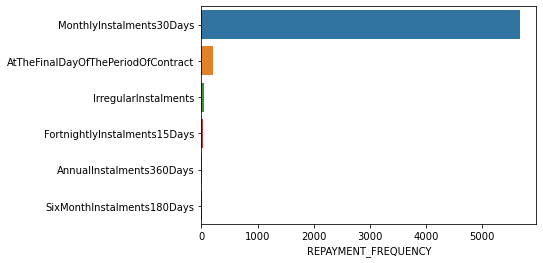

In [37]:
# Check the distribution of multiple Repayment_Frequency

cat_valcount_plot(df3, 'REPAYMENT_FREQUENCY')

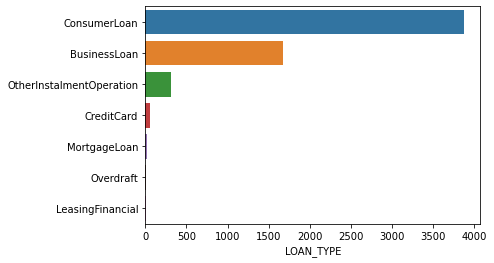

In [38]:
# Check the distribution of different Loan_Type

cat_valcount_plot(df3, 'LOAN_TYPE')

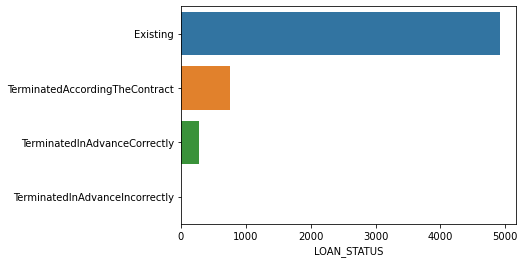

In [39]:
# Check the distribution of different Loan_Status

cat_valcount_plot(df3, 'LOAN_STATUS')

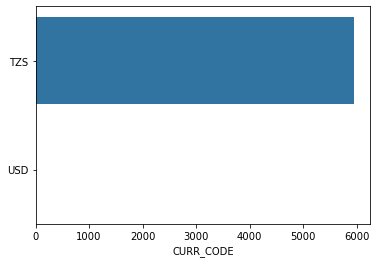

In [40]:
# Check the distribution of different Currencies

cat_valcount_plot(df3, 'CURR_CODE')

In [41]:
df3['CURR_CODE'].value_counts()

TZS    5955
USD       5
Name: CURR_CODE, dtype: int64

In [42]:
# Check the records which have currency in USD

df3[df3['CURR_CODE']=='USD'][['SANCTION_AMT', 'TOT_OUTSTD_BAL', 
                              'OVER_DUE_AMT', 'INSTALLMENT_AMT']]

,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,INSTALLMENT_AMT
599,44500.0,37510.66,0.00,967.90
649,100000.0,0.00,0.00,775.00
902,60000.0,1484.13,1484.13,1484.13
4010,40000.0,15815.56,0.00,1309.55
4338,35000.0,33958.13,0.00,657.26


In [43]:
# Since there are only 5 Loans in USD, let's convert all USD Loans into TZS

# Exchange rate from USD TO TZS (today's rate is 2332)
usd_tzs_conv_rate = 2335

df3.loc[df3['CURR_CODE']=='USD', ['SANCTION_AMT', 'TOT_OUTSTD_BAL', 
                                  'OVER_DUE_AMT', 'INSTALLMENT_AMT']] *= usd_tzs_conv_rate

/Users/dileepsathyan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [44]:
# Below USD values are now converted to TZS amounts
df3[df3['CURR_CODE']=='USD'][['SANCTION_AMT', 'TOT_OUTSTD_BAL', 
                              'OVER_DUE_AMT', 'INSTALLMENT_AMT']]

,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,INSTALLMENT_AMT
599,103907500.0,87587391.10,0.00,2260046.50
649,233500000.0,0.00,0.00,1809625.00
902,140100000.0,3465443.55,3465443.55,3465443.55
4010,93400000.0,36929332.60,0.00,3057799.25
4338,81725000.0,79292233.55,0.00,1534702.10


In [45]:
# Correcting the USD Currency code to TZS for the converted records
df3['CURR_CODE'].replace(['USD','TZS'], inplace=True)

# Visualise & Normalise the Numerical Variables

In [46]:
sns.histplot(df3['SANCTION_AMT'])

AttributeError: module 'seaborn' has no attribute 'histplot'

In [47]:
# Applying log transformation to the attributes to normalise the data

df3['SANCTION_AMT_LOG'] = np.log(df3['SANCTION_AMT'])
sns.histplot(df3['SANCTION_AMT_LOG'])

<ipython-input-47-afb67bcc594c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['SANCTION_AMT_LOG'] = np.log(df3['SANCTION_AMT'])


AttributeError: module 'seaborn' has no attribute 'histplot'

In [48]:
sns.histplot(df3['TOT_OUTSTD_BAL'])

AttributeError: module 'seaborn' has no attribute 'histplot'

In [49]:
# Applying log transformation to the attributes to normalise the data

# df3.replace([np.inf, -np.inf], np.nan, inplace=True)

df3['TOT_OUTSTD_BAL_LOG'] = np.log(df3['TOT_OUTSTD_BAL'])
sns.histplot(df3['TOT_OUTSTD_BAL_LOG'])

/Users/dileepsathyan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-49-7f1cb4fb8e4d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['TOT_OUTSTD_BAL_LOG'] = np.log(df3['TOT_OUTSTD_BAL'])


AttributeError: module 'seaborn' has no attribute 'histplot'

In [50]:
sns.histplot(df3['OVER_DUE_AMT'])

AttributeError: module 'seaborn' has no attribute 'histplot'

In [51]:
# Applying log transformation to the attributes to normalise the data

df3['OVER_DUE_AMT_LOG'] = np.log(df3['OVER_DUE_AMT'])
sns.histplot(df3['OVER_DUE_AMT_LOG'])

<ipython-input-51-d6c568e7699a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['OVER_DUE_AMT_LOG'] = np.log(df3['OVER_DUE_AMT'])


AttributeError: module 'seaborn' has no attribute 'histplot'

In [52]:
sns.histplot(df3['INSTALLMENT_AMT'])

AttributeError: module 'seaborn' has no attribute 'histplot'

In [53]:
# Applying log transformation to the attributes to normalise the data

df3['INSTALLMENT_AMT_LOG'] = np.log(df3['INSTALLMENT_AMT'])
sns.histplot(df3['INSTALLMENT_AMT_LOG'])

<ipython-input-53-4d44c9e1d4c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['INSTALLMENT_AMT_LOG'] = np.log(df3['INSTALLMENT_AMT'])


AttributeError: module 'seaborn' has no attribute 'histplot'

In [54]:
# Handle the inifinity values created from log functions.

df3.replace([np.inf, -np.inf], 0, inplace=True)
df3.head()

/Users/dileepsathyan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,SUBJECT_ID,ACCOUNT_ID,CURR_CODE,REPAYMENT_FREQUENCY,NUMBER_OF_INSTALLMENTS,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,INSTALLMENT_AMT,LOAN_TYPE,LOAN_STATUS,LOAN_TENURE,DPD,SANCTION_AMT_LOG,TOT_OUTSTD_BAL_LOG,OVER_DUE_AMT_LOG,INSTALLMENT_AMT_LOG
0,110113010000498773,2201160002396407,TZS,MonthlyInstalments30Days,6.0,400000.0,0.00,205609.4,0.00,OtherInstalmentOperation,Existing,183.0,399.0,12.899220,0.000000,12.233734,0.000000
1,110115010001596750,2201170002990772,TZS,MonthlyInstalments30Days,61.0,3500000.0,3272849.49,0.0,100243.11,ConsumerLoan,Existing,1832.0,0.0,15.068274,15.001172,0.000000,11.515354
2,110114010000832340,2201140001177207,TZS,MonthlyInstalments30Days,57.0,4200000.0,870462.93,0.0,106652.40,ConsumerLoan,Existing,1735.0,0.0,15.250595,13.676780,0.000000,11.577330
3,110114010000740514,2201160002371670,TZS,MonthlyInstalments30Days,24.0,60000000.0,15740676.93,0.0,2987342.81,BusinessLoan,Existing,730.0,18.0,17.909855,16.571759,0.000000,14.909895
4,110114010000811717,2201140001161294,TZS,MonthlyInstalments30Days,69.0,3400000.0,828981.51,0.0,99164.00,ConsumerLoan,Existing,2095.0,0.0,15.039286,13.627953,0.000000,11.504530


AttributeError: module 'seaborn' has no attribute 'histplot'

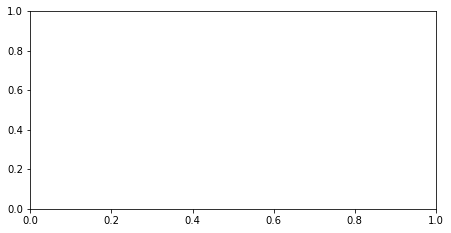

In [55]:
fig = plt.figure(figsize=(16,8))

plt.subplot(2, 2, 1)
sns.histplot(df3['SANCTION_AMT'])

plt.subplot(2, 2, 2)
sns.histplot(df3['TOT_OUTSTD_BAL'])

plt.subplot(2, 2, 3)
sns.histplot(df3['OVER_DUE_AMT'])

plt.subplot(2, 2, 4)
sns.histplot(df3['INSTALLMENT_AMT'])

plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

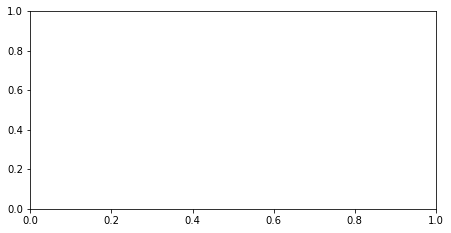

In [56]:
fig = plt.figure(figsize=(16,8))

plt.subplot(2, 2, 1)
sns.histplot(df3['SANCTION_AMT_LOG'])

plt.subplot(2, 2, 2)
sns.histplot(df3['TOT_OUTSTD_BAL_LOG'])

plt.subplot(2, 2, 3)
sns.histplot(df3['OVER_DUE_AMT_LOG'])

plt.subplot(2, 2, 4)
sns.histplot(df3['INSTALLMENT_AMT_LOG'])

plt.show()

In [57]:
# Create the Risk Identifier Dependant Variable from DPD
# Logic: A Loan is default if has DPD > 90 days

df3['IS_DEFAULT'] = np.where(df3['DPD'] >= 90, 1, 0)
df3.head()

,SUBJECT_ID,ACCOUNT_ID,CURR_CODE,REPAYMENT_FREQUENCY,NUMBER_OF_INSTALLMENTS,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,INSTALLMENT_AMT,LOAN_TYPE,LOAN_STATUS,LOAN_TENURE,DPD,SANCTION_AMT_LOG,TOT_OUTSTD_BAL_LOG,OVER_DUE_AMT_LOG,INSTALLMENT_AMT_LOG,IS_DEFAULT
0,110113010000498773,2201160002396407,TZS,MonthlyInstalments30Days,6.0,400000.0,0.00,205609.4,0.00,OtherInstalmentOperation,Existing,183.0,399.0,12.899220,0.000000,12.233734,0.000000,1
1,110115010001596750,2201170002990772,TZS,MonthlyInstalments30Days,61.0,3500000.0,3272849.49,0.0,100243.11,ConsumerLoan,Existing,1832.0,0.0,15.068274,15.001172,0.000000,11.515354,0
2,110114010000832340,2201140001177207,TZS,MonthlyInstalments30Days,57.0,4200000.0,870462.93,0.0,106652.40,ConsumerLoan,Existing,1735.0,0.0,15.250595,13.676780,0.000000,11.577330,0
3,110114010000740514,2201160002371670,TZS,MonthlyInstalments30Days,24.0,60000000.0,15740676.93,0.0,2987342.81,BusinessLoan,Existing,730.0,18.0,17.909855,16.571759,0.000000,14.909895,0
4,110114010000811717,2201140001161294,TZS,MonthlyInstalments30Days,69.0,3400000.0,828981.51,0.0,99164.00,ConsumerLoan,Existing,2095.0,0.0,15.039286,13.627953,0.000000,11.504530,0


# Correlation Matrix

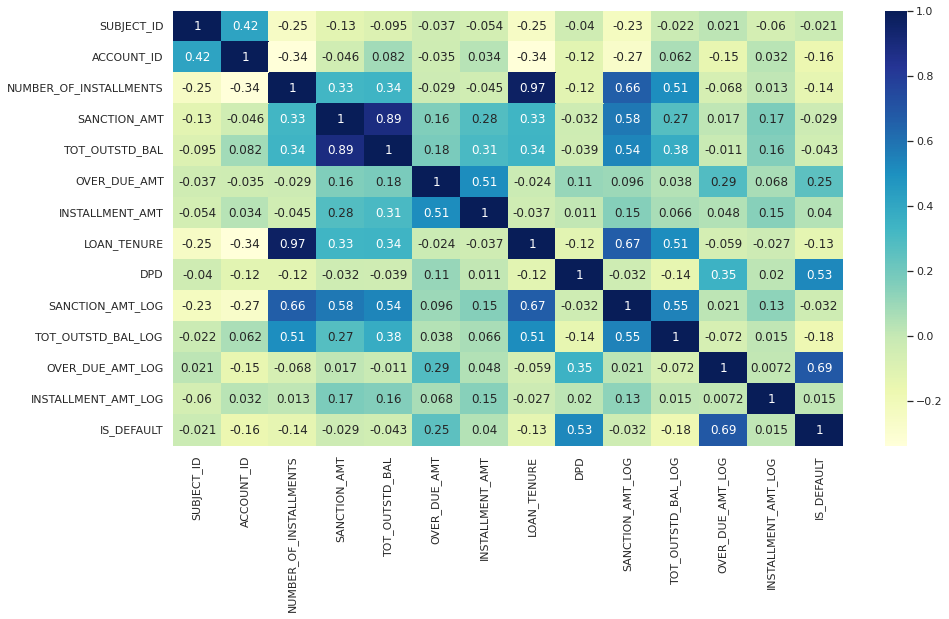

In [ ]:
# Keep a copy of the dataframe

df4 = df3.copy()


# Plot the heatmap to see the best correlated variables

corr = df4.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='YlGnBu')

In [ ]:
# Subset only the relevant variables for the modelling

features = ['REPAYMENT_FREQUENCY', 'NUMBER_OF_INSTALLMENTS', 'SANCTION_AMT_LOG',
            'TOT_OUTSTD_BAL_LOG', 'OVER_DUE_AMT_LOG', 'INSTALLMENT_AMT', 
            'LOAN_TYPE', 'LOAN_STATUS', 'LOAN_TENURE','IS_DEFAULT']
df4 = df4[features]
df4.head()

,REPAYMENT_FREQUENCY,NUMBER_OF_INSTALLMENTS,SANCTION_AMT_LOG,TOT_OUTSTD_BAL_LOG,OVER_DUE_AMT_LOG,INSTALLMENT_AMT,LOAN_TYPE,LOAN_STATUS,LOAN_TENURE,IS_DEFAULT
0,MonthlyInstalments30Days,6.0,12.899220,0.000000,12.233734,0.00,OtherInstalmentOperation,Existing,183.0,1
1,MonthlyInstalments30Days,61.0,15.068274,15.001172,0.000000,100243.11,ConsumerLoan,Existing,1832.0,0
2,MonthlyInstalments30Days,57.0,15.250595,13.676780,0.000000,106652.40,ConsumerLoan,Existing,1735.0,0
3,MonthlyInstalments30Days,24.0,17.909855,16.571759,0.000000,2987342.81,BusinessLoan,Existing,730.0,0
4,MonthlyInstalments30Days,69.0,15.039286,13.627953,0.000000,99164.00,ConsumerLoan,Existing,2095.0,0


# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ['REPAYMENT_FREQUENCY', 'LOAN_TYPE','LOAN_STATUS']
le = LabelEncoder()
for col in cols:
  df4[col] = le.fit_transform(df4[col])

df4.head()

,REPAYMENT_FREQUENCY,NUMBER_OF_INSTALLMENTS,SANCTION_AMT_LOG,TOT_OUTSTD_BAL_LOG,OVER_DUE_AMT_LOG,INSTALLMENT_AMT,LOAN_TYPE,LOAN_STATUS,LOAN_TENURE,IS_DEFAULT
0,4,6.0,12.899220,0.000000,12.233734,0.00,5,0,183.0,1
1,4,61.0,15.068274,15.001172,0.000000,100243.11,1,0,1832.0,0
2,4,57.0,15.250595,13.676780,0.000000,106652.40,1,0,1735.0,0
3,4,24.0,17.909855,16.571759,0.000000,2987342.81,0,0,730.0,0
4,4,69.0,15.039286,13.627953,0.000000,99164.00,1,0,2095.0,0


In [ ]:
df4[['REPAYMENT_FREQUENCY', 'LOAN_TYPE','LOAN_STATUS']].head()

,REPAYMENT_FREQUENCY,LOAN_TYPE,LOAN_STATUS
0,4,5,0
1,4,1,0
2,4,1,0
3,4,0,0
4,4,1,0


# Train Test Split

In [ ]:
# Specifying the input and output attributes

X = df4.drop(columns=['IS_DEFAULT'], axis=1)
y = df4['IS_DEFAULT']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Training

In [ ]:
# Classify function
from sklearn.model_selection import cross_val_score

def classify_model(model, x, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(X_train, y_train)
    print('Accuracy is: ', model.score(X_test, y_test)*100)

    # Cross validation
    score = cross_val_score(model, X, y, cv=5)
    print('Cross Validation Score: ', np.mean(score)*100)

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classify_model(model, X, y)

Accuracy is:  93.8255033557047
Cross Validation Score:  94.12751677852349


In [ ]:
# DecisionTree Classifier Model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify_model(model, X, y)

Accuracy is:  97.6510067114094
Cross Validation Score:  97.21476510067116


In [ ]:
# RandomForest Classifier Model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify_model(model, X, y)

Accuracy is:  98.12080536912752
Cross Validation Score:  98.0536912751678


# Confusion Matrix

In [ ]:
# Since the RandomForest Model perfoms better, we shall use it further

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1379,   19],
       [   8,   84]])

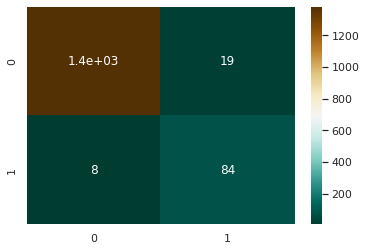

In [ ]:
sns.heatmap(cm, annot=True, cmap='BrBG_r')